Include at the top of every notebook.

In [2]:
import numpy as np
from datascience import *
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

#### 1. Use the tips.csv to do the following.

In [3]:
tips = Table.read_table('tips.csv')
tips

total_bill,tip,sex,smoker,day,time,size
16.99,1.01,Female,No,Sun,Dinner,2
10.34,1.66,Male,No,Sun,Dinner,3
21.01,3.5,Male,No,Sun,Dinner,3
23.68,3.31,Male,No,Sun,Dinner,2
24.59,3.61,Female,No,Sun,Dinner,4
25.29,4.71,Male,No,Sun,Dinner,4
8.77,2,Male,No,Sun,Dinner,2
26.88,3.12,Male,No,Sun,Dinner,4
15.04,1.96,Male,No,Sun,Dinner,2
14.78,3.23,Male,No,Sun,Dinner,2


#### a. Find the mean tip broken down by sex.

In [4]:
GenTips = Table.read_table('tips.csv').select(1,2)
GenTips

tip,sex
1.01,Female
1.66,Male
3.5,Male
3.31,Male
3.61,Female
4.71,Male
2,Male
3.12,Male
1.96,Male
3.23,Male


#### Build a histogram of tips for males overlaid by tips for females.

C:\Users\C20Elizabeth.Frakes\Documents\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


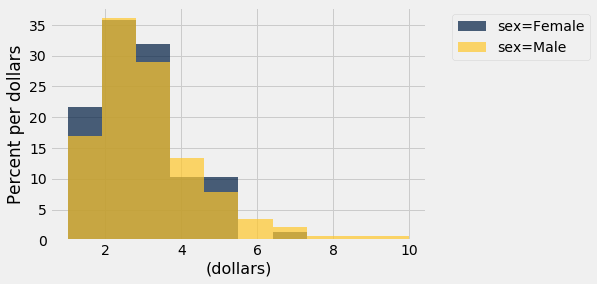

In [5]:
GenTips.hist('tip',group='sex',unit='dollars')

#### Find the mean tip broken down by sex.

In [6]:
Group = GenTips.group('sex',np.mean)   
Group

sex,tip mean
Female,2.83345
Male,3.08962


Discussion: The mean tip for males was higher than mean tip for females.

#### b. Repeat but broken down in time.

In [7]:
TimeTips = Table.read_table('tips.csv').select(1,5)
Time = TimeTips.group('time',np.mean)
Time

time,tip mean
Dinner,3.10267
Lunch,2.72809


C:\Users\C20Elizabeth.Frakes\Documents\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


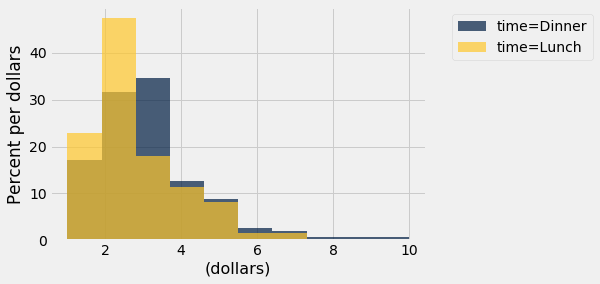

In [8]:
TimeTips.hist('tip',group='time',unit='dollars')

Discussion: The mean tip for dinner was higher than mean tip at lunch.

#### 2. Create function denoting day of the week.

In [9]:
def weekday_to_num(weekday):
    """Returns number for day of the week."""
    
    if weekday == 'Mon':
        return 1
    if weekday == 'Tues':
        return 2
    if weekday == 'Wed':
        return 3
    if weekday == 'Thur':
        return 4
    if weekday == 'Fri':
        return 5
    if weekday == 'Sat':
        return 6
    if weekday == 'Sun':
        return 7

In [10]:
weekday_to_num('Sun')

7

#### 3. Apply weekday_to_num to the days column of tips.csv.

In [11]:
weekday_num = tips.apply(weekday_to_num, 'day')
tips.with_column('weekday_to_num', weekday_num)

total_bill,tip,sex,smoker,day,time,size,weekday_to_num
16.99,1.01,Female,No,Sun,Dinner,2,7
10.34,1.66,Male,No,Sun,Dinner,3,7
21.01,3.5,Male,No,Sun,Dinner,3,7
23.68,3.31,Male,No,Sun,Dinner,2,7
24.59,3.61,Female,No,Sun,Dinner,4,7
25.29,4.71,Male,No,Sun,Dinner,4,7
8.77,2,Male,No,Sun,Dinner,2,7
26.88,3.12,Male,No,Sun,Dinner,4,7
15.04,1.96,Male,No,Sun,Dinner,2,7
14.78,3.23,Male,No,Sun,Dinner,2,7


#### 4. Create a function called est_tip.

In [12]:
def est_tip(total_bill,nearby=1):
    """This funciton predicts the tip based on the total bill."""
    nearby = tips.where('total_bill', are.between(total_bill-nearby,total_bill+nearby))
    return nearby.column('tip').mean()

In [13]:
est_tip(10) #This is a test.

1.821578947368421

#### 5. Apply est_tip function to the total_bill. Make Scatterplot.

In [14]:
est_tips = tips.apply(est_tip,'total_bill')
tips.with_column('estimated_tip',est_tips)

total_bill,tip,sex,smoker,day,time,size,estimated_tip
16.99,1.01,Female,No,Sun,Dinner,2,2.82437
10.34,1.66,Male,No,Sun,Dinner,3,1.81136
21.01,3.5,Male,No,Sun,Dinner,3,3.3425
23.68,3.31,Male,No,Sun,Dinner,2,3.33867
24.59,3.61,Female,No,Sun,Dinner,4,3.56267
25.29,4.71,Male,No,Sun,Dinner,4,4.19909
8.77,2,Male,No,Sun,Dinner,2,1.865
26.88,3.12,Male,No,Sun,Dinner,4,3.48111
15.04,1.96,Male,No,Sun,Dinner,2,2.426
14.78,3.23,Male,No,Sun,Dinner,2,2.43833


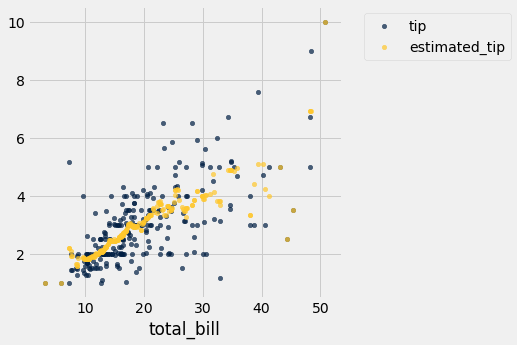

In [15]:
tips.with_column('estimated_tip',est_tips).select('total_bill','tip','estimated_tip').scatter('total_bill')